#                                                        Contexto  
Se tiene un sistema de aire comprimido, en el cual un compresor suministra aire a dos depósitos en serie conectados mediante tuberías cilíndricas.

Para cada tramo de tubería se define una resistencia al flujo de aire $(R_f,i)$, que depende del
diámetro de la tubería, de su longitud, y de las propiedades del aire que fluye por su interior:
$$Rf,i\cong\dfrac {128µLi }{πρd^4}     \qquad (1) $$

Para cada tanque se define una capacitancia de flujo $Cf_i$, la cual está relacionada con su
capacidad para almacenar fluidos:
$$R_f,i\cong\dfrac {πD_i^2}{4*g}     \qquad (2) $$

El modelo físico que describe este sistema determina cómo evoluciona la presión en los tanques cuando se enciende el compresor. Las ecuaciones diferenciales que componen el modelo son las siguientes:
$$(C_f1*R_f1*R_f2)\dfrac {dp_1(t)}{dt} + (R_f,1 + R_f,2)*p1(t)+ Rf_1*p2(t) = Rf_2 *pcomp     \qquad(3) $$

$$(C_f1 *C_f2*R_f1*R_f2)\dfrac {d^2p_2(t)}{dt^2} + [C_f2*(R_f1 + R_f2) + Cf,1 * Rf,1]\dfrac {dp_2(t)}{dt}+ p_2(t) = pcomp  \qquad (4) $$

Las variables p1(t) y p2(t) son las presiones en los tanques 1 y 2, respectivamente. La variable pcomp representa la presión de  suministro de aire por parte del compresor, la cual se considera constante e igual a 5 bar (manométrica) desde el inicio del proceso.
La presión en los tanques y en las tuberías en el momento en el cual se enciende el compresor es la atmosférica. Si se toman todas las presiones como manométricas, este valor de presión inicial es igual a cero.


Para el problema planteado se pide:
1. Resuelva las ecuaciones 3 y 4 usando el método de Runge–Kutta de cuarto orden, desde el instante en el cual se enciende el compresor (t = 0) hasta t = 700 s, usando un paso de tamaño 1 s.
2. Una vez se calcule la solución, represente en la misma gráfica la evolución de las dos presiones (en bar) con el tiempo (en s) para el dominio especificado . Analice brevemente el resultado.




# Importacion de librerias

In [1]:
import numpy as np
import pandas as pd 
import copy as copy
import matplotlib.pyplot as plt
%matplotlib inline

# Definición de constantes
 
Se procede a definir los valores de las variables que compomen el sitema (longitudes,diámetros y demás variables), para así continuar con el calculo los valores de resistencia al flujo de aire y la capacitancia de flujo de cada tramo de tuberia.

In [2]:
L_1 = 3        # m
L_2 = 6        # m
d_1 = 0.03     # m
d_2 = 0.03      # m
p = 1.21       # kg/m^3
u = 89/5000000   # Ns/m^2
g = 9.81          #m/s^2
D_1 = 0.5          # m
D_2 = 0.4          # m
Pcom = 5           #bar
R_f_1 = (128*u*L_1)/(np.pi*p*(d_1)**4)          #resistencia al flujo de aire 1
R_f_2 = (128*u*L_2)/(np.pi*p*(d_2)**4)          #resistencia al flujo de aire 2
C_f_1 = (np.pi*(D_1)**2)/(4*g)                  #capacitancia de flujo 1
C_f_2 = (np.pi*(D_2)**2)/(4*g)                  #capacitancia de flujo 2

# Simplificación de las ecuaciones que modelan el sistema

Se procede a simplificar la ecuación diferencial resumiendo los valores constantes que acompañan a las variables.

$a_1=(C_f1*R_f1*R_f2)$

$b_1=(R_f,1 + R_f,2)$

$c_1=Rf_1$

$a_2=(C_f1 *C_f2*R_f1*R_f2)$

$b_2=(C_f2*(R_f1 + R_f2) + Cf_1 * R_f1)$

$c_2=1$

$d_2=Pcom$



$$a_1*p'_1 + b_1*p_1+ c_1*p_2 = d_1    \qquad(5) $$

$$a_2* p'' +p'_2*b_2+c_2*p_2 = d_2 \qquad (6) $$



In [3]:
a1 = (C_f_1*R_f_1*R_f_2)
a2 = (C_f_1*C_f_2*R_f_2*R_f_1)
b1 = (R_f_1 + R_f_2)
b2 = (C_f_2*(R_f_1 + R_f_2) + C_f_1*R_f_1)
c1 = (R_f_1)
c2= 1
d1 = (R_f_2*Pcom) 
d2 = (Pcom)


# Definición del problema 

Se procede a plantear el problema por medio de la lógica de runge-kutta, para eso primero se despeja la derivada de mayor orden en 5 y 6 y se procede a plantear las ecuaciones diferenciales como un sistema de ecuaciones ordinarias de primer orden 

$$\dfrac {d_1 - b_1*p_1 - c_1*p_2}{a_1} = p'_1   \qquad(7) $$

$$\dfrac {d_2 - b_2*p'_2-c_2*p_2}{a_2} =p''_2 \qquad (8) $$

Para reducir el orden se hace la siguiente transformación de variables

$$  Y_0=P_1\qquad  Y_1=P_2  \qquad  Y_2=P'_2$$

Para contrUir el sistema de ecuaciones se derivan las anteriores sustituciones y se plantean nuevamente las ecuaciones que modelan el sistema

$$ \dfrac {dy_0}{dt}= p'_1  \qquad \dfrac {dy_1}{dt}= p'_2  \qquad \dfrac {dy_2}{dt}= p''_2  $$

$ \dfrac {dY_0}{dt}=\dfrac {d_1 - b_1*Y_0 - c_1*Y_1}{a_1} $

$ \dfrac {dY_1}{dt}= Y_2 $

$ \dfrac {dY_2}{dt}=\dfrac {d_2 - b_2*Y_2-c_2*Y_1}{a_2}$

Para resolver el anterior sistema de ecuaciones se deben tener en cuenta las condiciones iniciales que compañan al proceso en un tiempo t=0


CONDICIONES INICALES

$Y_0=p_1(0)=0$

$Y_1=p_2(0)=0$

$Y_2=p'_2(0)=0$






In [4]:
n=3                                                                              # número de ecuaciones
F= {'F1':'(d1-b1*y[0]-c1*y[1])/a1','F2':'y[2]', 'F3':'(d2-b2*y[2]-c2*y[1])/a2'}  #ecuaciones
int_sol = (0,700)                                 #intervalo de solución 
a = float(int_sol[0]); b= float(int_sol[1])
h = float(1)                                      #paso
y_0ls =(0,0,0)                                    #Condiciones iniciales 
y_0  = np.array(eval('['+str(y_0ls)+']'))        

In [5]:
xsol=np.arange(a,b+h,h)
nx=len(xsol)
ysol=np.zeros((nx,n)) #Matriz de solución (nx x n)
ysol[0,:] = y_0[0,:]
phi=np.zeros((n,1)) #Pendiente
#Términos de la pendiente
k1= np.zeros((n,1))         
k2=np.zeros((n,1))              # términos de la pendiente
k3=np.zeros((n,1))
k4=np.zeros((n,1))
for i in range(1,nx):
    x=xsol[i-1]; y=copy.copy(ysol[i-1,:])       #Soluciones 
    for j in range(n):
        k1[j]=eval(F['F' +str(j+1)])           # K1 para todas las ecuaciones evaluando F1.F2,F3
    x=xsol[i-1]+(1/2)*h
    for k in range(n):
        y[k]=copy.copy(ysol[i-1,k]+(1/2)*k1[k]*h)      
    for j in range(n):
        k2[j]=eval(F['F' +str(j+1)])            # K2 para todas las ecuaciones evaluando F1.F2,F3
    for k in range(n):
        y[k]=copy.copy(ysol[i-1,k]+(1/2)*k1[k]*h)
    for j in range(n):
        k3[j]=eval(F['F' +str(j+1)])            # K3 para todas las ecuaciones evaluando F1.F2,F3
        x=xsol[i-1]+h
    for k in range(n):
        y[k]=copy.copy(ysol[i-1,k]+k3[k]*h)
    for j in range(n):
        k4[j]= eval(F['F'+str(j+1)])              # K4 para todas las ecuaciones evaluando F1.F2,F3
    for j in range(n):
        phi[j]=(1/6)*(k1[j]+2*k2[j]+2*k3[j]+k4[j])    # pendiente de cada ecuación
        ysol[i,j]=ysol[i-1,j]+phi[j]*h                 #soluciones


# GRÁFICAS
Utilizando la librerias de maplolib se procede a graficar la presión del tanque 1 y el tanque 2 

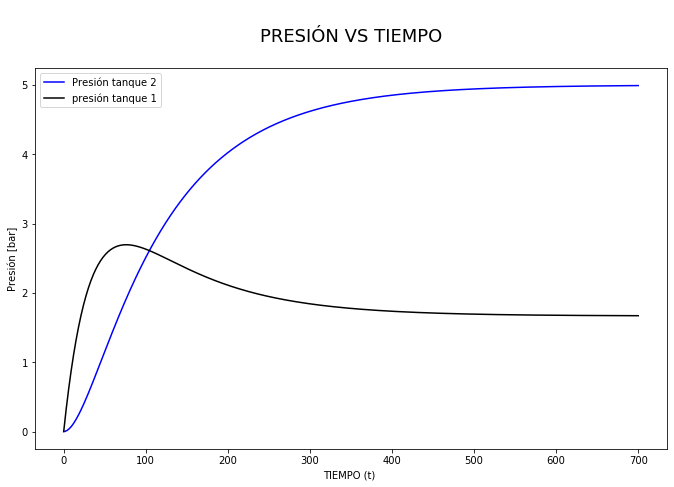

In [6]:
plt.figure(figsize=(7*1.618,7))
plt.plot(xsol,ysol[:,1],color='b',marker='',label='Presión tanque 2')
plt.plot(xsol,ysol[:,0],color='k',marker='',label='presión tanque 1')
plt.xlabel('TIEMPO (t) ')
plt.ylabel('Presión [bar]')
_=plt.legend()
_=plt.title("\nPRESIÓN VS TIEMPO\n",fontsize = 18)

# Resultados
Inicialmente la presión en el tanque 1 es mayor que en el tanque 2, esto puede ser debido esta en contacto directo con el compresor. Luego a medida que transcurre el tiempo, se puede observar en la gráfica que la presión en el tanque 2 supera a la del tanque 1, esto debido a que la presión se define como p=f/a y dado que el tanque 1 posee un mayor diámetro a medida que se estabilice el sistema su presión en comparación con el tanque 2, será menor.
